In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\dell\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
data=pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\Honda_Data.csv")
data.head(5)

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1980-03-17,0.547989,0.893750,0.909375,0.893750,0.893750,26000
1,1980-03-18,0.557569,0.909375,0.909375,0.909375,0.909375,2000
2,1980-03-19,0.551821,0.900000,0.900000,0.900000,0.900000,2000
3,1980-03-20,0.551821,0.900000,0.900000,0.900000,0.900000,0
4,1980-03-21,0.551821,0.900000,0.900000,0.900000,0.900000,2000


In [3]:
data.isnull().sum()

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11293 entries, 0 to 11292
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11293 non-null  object 
 1   Adj_Close  11293 non-null  float64
 2   Close      11293 non-null  float64
 3   High       11293 non-null  float64
 4   Low        11293 non-null  float64
 5   Open       11293 non-null  float64
 6   Volume     11293 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.7+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)

<Axes: xlabel='Date', ylabel='Close'>

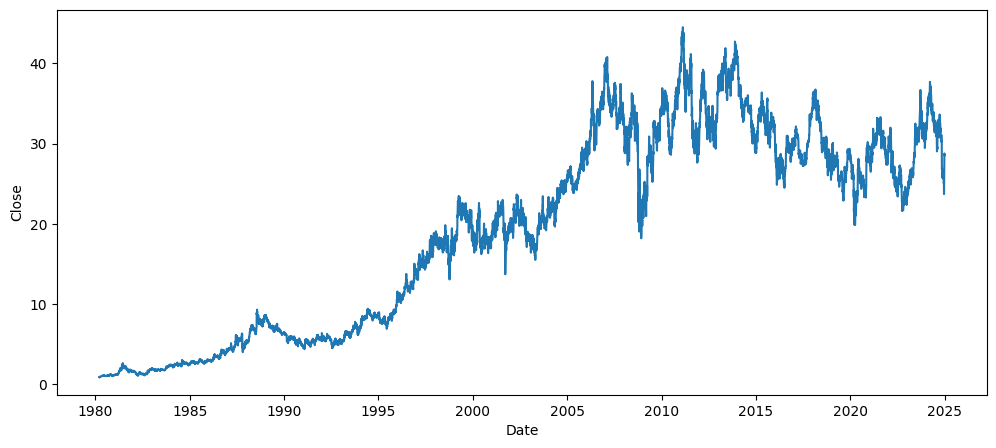

In [6]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Date",y="Close",data=data)

In [7]:
df=data[["Close"]].values

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [9]:
def create_sequence(df,sequence_length):
    X=[]
    y=[]
    for i in range (sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [10]:
sequence_length=10

In [11]:
X,y=create_sequence(scaler_data,sequence_length)

In [12]:
X=X.reshape((X.shape[0],X.shape[1],1))
print(X.shape,y.shape)

(11283, 10, 1) (11283,)


In [13]:
model = Sequential()
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X,y,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0481
Epoch 2/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0041
Epoch 3/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0035
Epoch 4/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029
Epoch 5/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029
Epoch 6/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0025
Epoch 7/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0024
Epoch 8/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0023
Epoch 9/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0022
Epoch 10/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021
Epoch 11/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0021
Epoch 12/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0020
Epoch 13/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0021
Epoch 14/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0021
Epoch 15/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
loss=model.evaluate(X,y)
print("Model loss:",loss)

In [ ]:
predictions=model.predict(X)
predictions=scaler.inverse_transform(predictions)
print(predictions[:10])

In [ ]:
actual_values=scaler.inverse_transform(y.reshape(-1,1))

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values",color="blue")  
plt.plot(predictions, label="Predicted Values",color="orange") 
plt.legend()
plt.title('LSTM Prediction vs Actual Values')  
plt.xlabel('Time Step') 
plt.ylabel('Value')  
plt.show()